In [ ]:
# UNSUPERVISED LEARNING - K MEANS CLUSTERING
# IN CLUSTERING THERE IS NO y(OUTPUT). WE ONLY HAVE INPUT TO TRAIN OUR MODEL.

In [ ]:
# dataset - https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/master/driver-data.csv
# 1. TAKE DATA AND CREATE DATFRAME

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/master/driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [ ]:
df.shape

(4000, 3)

In [ ]:
df.size

12000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
# INPUT - mean_dist_day and mean_over_speed

In [ ]:
# 4. DIVIDE INTO INPUT
x = df.iloc[:,1:3].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

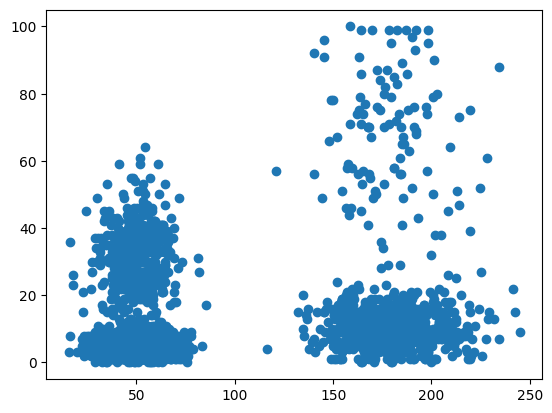

In [ ]:
# VISUALISATION
import matplotlib.pyplot as plt
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
# HERE WE HAVE GOT ONLY 1 CLUSTER  BECAUSE THERE IS ONLY ONE COLOUR BEFORE APPLYING ANY CLUSTERING TECHNIQUE

In [ ]:
# HERE OUR MAIN TASK IS TO FIND OUT THE NO OF CLUSTERS(K)
import numpy as np
np.sqrt(4000)  #4000 is the total no of points.
# K VALUE SHOULD NOT EXCEED THE SQUARE ROOT OF TOTAL NO OF POINTS
# HENCE K VALUE SHOULD BE WITHIN RANGE OF 2-63
# MIN 2 POINTS ARE REQUIRED TO MAKE CLUSTER. ONLY 1 CLUSTER MEANS RAW DATA.

63.245553203367585

In [ ]:
# WE NEED TO FIND OUT THE NO OF CLUSTERS(K). WE CAN FIND BY TWO WAYS.
# 1. ELBOW METHOD - PROBLEM IS SLIGHTLY CONFUSING
# 2. SILHOUETTE SCORE METHOD - VERY ACCURATE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

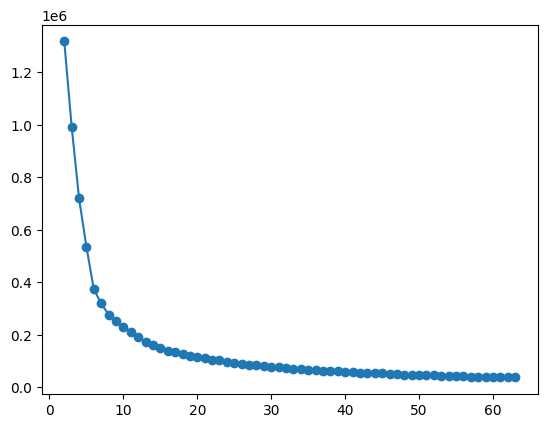

In [ ]:
from pandas.core.indexers.objects import FixedWindowIndexer
# 1. ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,64)

sse = [] # blank list for now
# SSE - SUM OF SQUARE ERROR VALUES WE WILL APPEND IT IN THE BLANK LIST
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_) # .inertia_ - calculates the sum of square error
plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
# WE WILL NOW CONSIDER THE POINT AT WHICH THE ELBOW IS MORE PROMINENT(PROJECTING FROM SOMETHING)
# WE WILL CONSIDER K AS 6 BUT WE ARE NOT SURE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 Clusters ,Score = 0.8490223286225532


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 Clusters ,Score = 0.8231396834167266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 Clusters ,Score = 0.5907475009381601


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters ,Score = 0.5120892324508957


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 Clusters ,Score = 0.48551213669411253


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 Clusters ,Score = 0.45977729341596674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 Clusters ,Score = 0.44959617741115254


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 Clusters ,Score = 0.4475202849207188


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 Clusters ,Score = 0.4353035086483064


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11 Clusters ,Score = 0.410732500473365


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12 Clusters ,Score = 0.40434837787343597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13 Clusters ,Score = 0.41343211893051796


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14 Clusters ,Score = 0.4115457377851544


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15 Clusters ,Score = 0.3983376573094215


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16 Clusters ,Score = 0.3896081235659933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17 Clusters ,Score = 0.389413898470084


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18 Clusters ,Score = 0.3874219084901238


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19 Clusters ,Score = 0.38668097051862554


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


20 Clusters ,Score = 0.38769492009917017


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


21 Clusters ,Score = 0.3609340538102696


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22 Clusters ,Score = 0.36383684608588657


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


23 Clusters ,Score = 0.3593402816421697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24 Clusters ,Score = 0.3690278603216452


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


25 Clusters ,Score = 0.35338299682530644


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


26 Clusters ,Score = 0.3594156926512298


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


27 Clusters ,Score = 0.35330446254763936


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


28 Clusters ,Score = 0.3594791824938587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


29 Clusters ,Score = 0.3457570749773936


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30 Clusters ,Score = 0.3524256811670549


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31 Clusters ,Score = 0.3319324290279665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32 Clusters ,Score = 0.3365316150563325


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


33 Clusters ,Score = 0.3445093770261938


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


34 Clusters ,Score = 0.34056076995773843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


35 Clusters ,Score = 0.3366597240341744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


36 Clusters ,Score = 0.3382381684700564


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37 Clusters ,Score = 0.3371435533141799


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


38 Clusters ,Score = 0.33987581711399395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


39 Clusters ,Score = 0.3324302809335456


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40 Clusters ,Score = 0.33697171424507005


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


41 Clusters ,Score = 0.3342468732313736


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


42 Clusters ,Score = 0.3413966203270661


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


43 Clusters ,Score = 0.3349803459490547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


44 Clusters ,Score = 0.3211620904378524


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


45 Clusters ,Score = 0.33182476416973133


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


46 Clusters ,Score = 0.3293179316132308


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


47 Clusters ,Score = 0.3314845951352408


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


48 Clusters ,Score = 0.33757019665021215


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


49 Clusters ,Score = 0.32242252494265256


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


50 Clusters ,Score = 0.33085692260243516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


51 Clusters ,Score = 0.33173348592529667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


52 Clusters ,Score = 0.3295673807082701


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


53 Clusters ,Score = 0.3339565883551296


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


54 Clusters ,Score = 0.3281892758253205


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


55 Clusters ,Score = 0.3254803140532004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


56 Clusters ,Score = 0.33339975015690365


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


57 Clusters ,Score = 0.3300299249626894


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


58 Clusters ,Score = 0.32370307670822773


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


59 Clusters ,Score = 0.3230893510191155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


60 Clusters ,Score = 0.330398760932859


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


61 Clusters ,Score = 0.32853024930874836


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


62 Clusters ,Score = 0.32402807194276995


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


63 Clusters ,Score = 0.3270173041633992


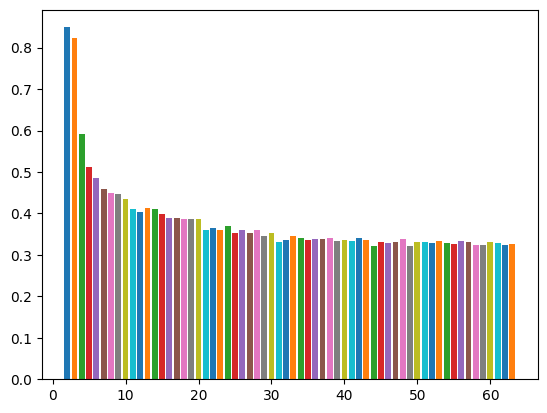

In [ ]:
# 2. SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,64)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))
  # WE HAVE TO CHECK FOR THE MAX SILHOUETTE'S SCORE FOR THE CLUSTER VALUE.

In [ ]:
# THE NO OF CLUSTERS IS CONSIDERED TO BE 2

In [ ]:
# 7. APPLY CLUSTERER
k = 2
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
# ACTUAL OUPUT
y = model.predict(x) # PREDICTED OUTPUT
y
# THESE ARE THE CLUSTER NUMBERS

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
y.size

4000

In [ ]:
x[y == 1,0]
# THE FIRST '0' IS CLUSTER NO.1 AND THE SECOND '1' IS COLUMN INDEX 1
# THE VALUE OF INPUT, WHEN CLUSTER NO.0 IS SELECTED AND COLUMN INDEX 1 IS SELECTED

array([179.22, 192.34, 140.25, 184.28, 200.58, 197.99, 199.81, 168.45,
       197.87, 172.08, 164.31, 162.56, 165.2 , 211.36, 157.51, 208.47,
       180.95, 167.83, 144.23, 163.82, 186.28, 182.21, 149.08, 171.83,
       212.8 , 185.3 , 170.11, 175.82, 234.52, 164.03, 200.77, 168.47,
       184.79, 158.61, 192.11, 176.49, 190.97, 175.93, 157.99, 197.56,
       140.32, 162.56, 181.12, 197.26, 156.85, 164.13, 187.37, 174.32,
       145.21, 178.05, 183.7 , 121.07, 171.16, 148.  , 162.93, 163.17,
       184.96, 178.28, 190.13, 167.55, 176.01, 157.02, 173.72, 224.47,
       219.46, 156.79, 193.01, 191.2 , 183.98, 181.04, 192.37, 185.03,
       202.94, 178.47, 213.93, 188.36, 164.08, 173.91, 175.29, 208.65,
       212.49, 183.78, 162.3 , 164.83, 172.53, 179.26, 187.12, 191.47,
       202.02, 188.06, 201.54, 165.23, 183.92, 166.22, 167.75, 219.54,
       209.43, 145.28, 185.5 , 168.77, 174.41, 169.45, 159.2 , 184.76,
       228.21, 151.81, 158.47, 186.03, 169.85, 154.52, 198.3 , 149.71,
      

In [ ]:
np.unique(y,return_counts = True)
# CLUSTER 0 HAS 3200 PAIR OF ELEMENTS AS WE HAVE TWO ROWS AS INPUT

(array([0, 1], dtype=int32), array([3200,  800]))

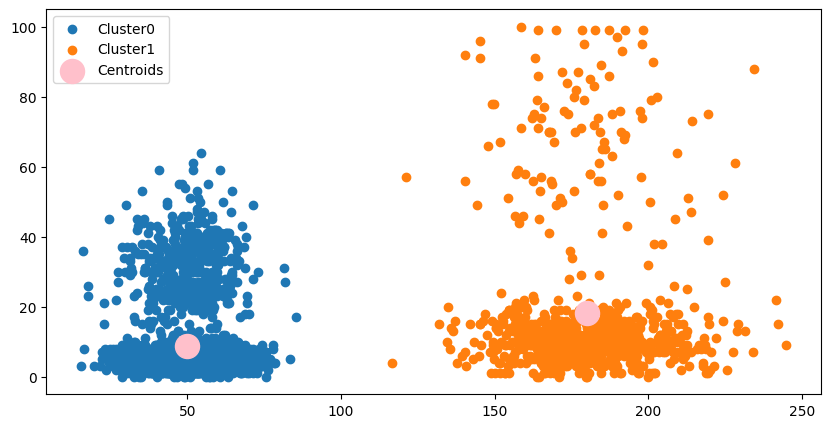

In [ ]:
# FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300, c = 'pink', label = 'Centroids')
plt.legend()